# JSON. Работаем с pandas. Из JSON в pandas

### ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [3]:
# Импортируем модуль json
import json 
# Импортируем функцию pprint()
from pprint import pprint 
# Импортируем модуль pandas
import pandas as pd 
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 
# Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
# Выводим на экран первые строки полученного DataFrame
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### ДОПОЛНИТЕЛЬНО
Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).

In [4]:
# Импортируем модуль pandas
import pandas as pd 
# Создаём объект DataFrame, загружая содержимое файла recipes.json
df = pd.read_json('recipes.json') 

# Выводим на экран первые строки полученного DataFrame
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   cuisine      500 non-null    object
 2   ingredients  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


→ Итак, получившийся DataFrame содержит информацию о рецептах из нашего JSON-файла. 

Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

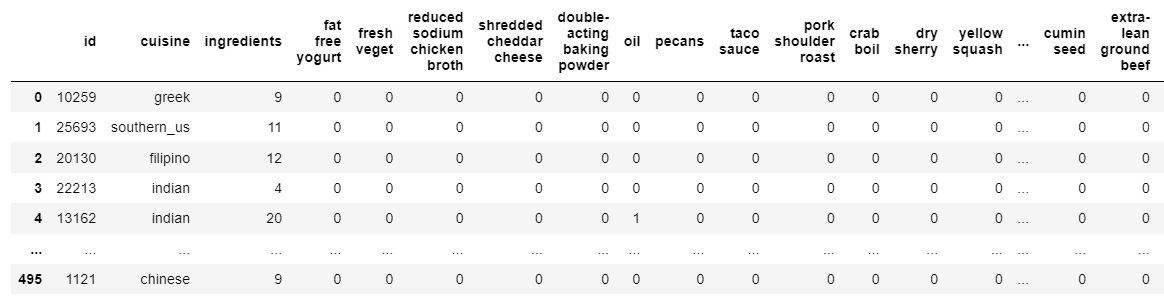

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.

1. Создадим функцию для проверки наличия ингредиента
Функция будет принимать список ингредиентов из строки и проверять, присутствует ли конкретный ингредиент.

In [6]:
def contains_ingredient(ingredients, ingredient):
    return 1 if ingredient in ingredients else 0

2. Создадим список уникальных ингредиентов
Чтобы получить список всех уникальных ингредиентов, нам нужно объединить списки из столбца ingredients и взять уникальные значения.

In [7]:
# Список всех уникальных ингредиентов
unique_ingredients = set(ingredient for ingredients in df['ingredients'] for ingredient in ingredients)

3. Добавим столбцы для каждого ингредиента
Для каждого уникального ингредиента создадим новый столбец и заполним его, применив функцию contains_ingredient.

In [8]:
for ingredient in unique_ingredients:
    df[ingredient] = df['ingredients'].apply(lambda x: contains_ingredient(x, ingredient))

C:\Users\1\AppData\Local\Temp\ipykernel_12916\3529199613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient] = df['ingredients'].apply(lambda x: contains_ingredient(x, ingredient))
C:\Users\1\AppData\Local\Temp\ipykernel_12916\3529199613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient] = df['ingredients'].apply(lambda x: contains_ingredient(x, ingredient))
C:\Users\1\AppData\Local\Temp\ipykernel_12916\3529199613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [9]:
# Выводим преобразованный DataFrame
display(df.head())

,id,cuisine,ingredients,juice,yellow corn meal,white sugar,green cardamom,yellow onion,fresh chives,black mustard seeds,...,light pancake syrup,sharp cheddar cheese,broccoli rabe,radishes,salt,dry vermouth,chicken drumsticks,sliced black olives,tahini,whole wheat pasta
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


---

Задание 1

Создайте реестр уникальных ингредиентов all_ingredients, который будет использоваться на втором этапе. Какое количество уникальных ингредиентов в нашем DataFrame?

In [10]:
# Создаём реестр уникальных ингредиентов
all_ingredients = set(ingredient for ingredients in df['ingredients'] for ingredient in ingredients)

# Выводим количество уникальных ингредиентов
print(f"Количество уникальных ингредиентов: {len(all_ingredients)}")

Количество уникальных ингредиентов: 1318


---

→ Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

 Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует:

In [11]:
# Определяем имя функции и передаваемые аргументы    
def contains(ingredient_list): 
    # Если ингредиент есть в текущем блюде,
    if ingredient_name in ingredient_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0

Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().

In [12]:
# Последовательно перебираем ингредиенты в реестре all_ingredients
for ingredient_name in all_ingredients: 
    # В DataFrame cоздаем столбец с именем текущего ингредиента 
    # и заполняем его единицами и нулями,
    # используя ранее созданную функцию contains
    df[ingredient_name] = df['ingredients'].apply(contains)

В завершение изменим значение столбца ingredients — вместо списка ингредиентов в каждом рецепте заполним столбец данными о количестве ингредиентов в нём:

In [13]:
# Заменяем список ингредиентов в рецепте на их количество 
df['ingredients'] = df['ingredients'].apply(len) 
# Выводим содержимое полученного DataFrame на экран
display(df)

,id,cuisine,ingredients,juice,yellow corn meal,white sugar,green cardamom,yellow onion,fresh chives,black mustard seeds,...,light pancake syrup,sharp cheddar cheese,broccoli rabe,radishes,salt,dry vermouth,chicken drumsticks,sliced black olives,tahini,whole wheat pasta
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


---

Задача

Напишите код для создания списка ids всех блюд, представленных в датафрейме. Нужны только уникальные значения.

Порядок id должен совпадать с тем, как они расположены в исходном датафрейме.

Примечание. Не забудьте импортировать библиотеки и прочитать файл recipes.csv.

In [16]:
# Возможный вариант решения:
import pandas as pd

df = pd.read_csv('recipes.csv') # Читаем содержмиое файла и создаем объект df
ids = list(df['id'].unique()) # Создаем список уникальных значений id блюд

---

### СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

In [15]:
df.to_csv('recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().